In [2]:
import pandas as pd
import numpy as np
import json 
import pymongo as pm
import certifi
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [3]:
# Fetch credentials for MongoDB Compass to access the cluster and its collections 
with open("/Users/tiffanivick/Desktop/credentials.json") as file:
  data = json.load(file)
  
  # Connect string
  connection_string = data["mongodb"]
  
  # Connect to the database with certificate
  superhero_client = pm.MongoClient(connection_string, tlsCAFile=certifi.where())
  
  # Fetch the database
  db = superhero_client["DB1"]["Superhero2"]
  
  

In [4]:
# Retrieve and transform the Superhero2 dataset 
superhero2 = db.aggregate(list([
    {
        '$project': {
            'id': {
                '$convert': {
                    'input': '$id', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'title': {
                '$convert': {
                    'input': '$title', 
                    'to': 'string', 
                    'onError': None
                }
            }, 
            'runtime': {
                '$convert': {
                    'input': '$runtime', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'user_rating': {
                '$convert': {
                    'input': '$user_rating', 
                    'to': 'double', 
                    'onError': None
                }
            }, 
            'votes': {
                '$convert': {
                    'input': '$votes', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'budget': {
                '$convert': {
                    'input': '$budget', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'opening_weekend': {
                '$convert': {
                    'input': '$opening_weekend', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'gross_sales': {
                '$convert': {
                    'input': '$gross_sales', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'genres': {
                '$split': [
                    '$genres', ','
                ]
            }, 
            'genresTrimmed': {
                '$map': {
                    'input': {
                        '$split': [
                            '$genres', ','
                        ]
                    }, 
                    'as': 'genres_split', 
                    'in': {
                        '$trim': {
                            'input': '$$genres_split'
                        }
                    }
                }
            }, 
            'cast': {
                '$split': [
                    'cast', ','
                ]
            }, 
            'castTrimmed': {
                '$map': {
                    'input': {
                        '$split': [
                            '$cast', ','
                        ]
                    }, 
                    'as': 'cast_split', 
                    'in': {
                        '$trim': {
                            'input': '$$cast_split'
                        }
                    }
                }
            }, 
            'director': {
                '$split': [
                    '$director', ','
                ]
            }, 
            'directorTrimmed': {
                '$map': {
                    'input': {
                        '$split': [
                            '$director', ','
                        ]
                    }, 
                    'as': 'director_split', 
                    'in': {
                        '$trim': {
                            'input': '$$director_split'
                        }
                    }
                }
            }, 
            'producer': {
                '$split': [
                    '$producer', ','
                ]
            }, 
            'producerTrimmed': {
                '$map': {
                    'input': {
                        '$split': [
                            '$producer', ','
                        ]
                    }, 
                    'as': 'producer_split', 
                    'in': {
                        '$trim': {
                            'input': '$$producer_split'
                        }
                    }
                }
            }, 
            'company': {
                '$split': [
                    '$company', ','
                ]
            }, 
            'companyTrimmed': {
                '$map': {
                    'input': {
                        '$split': [
                            '$company', ','
                        ]
                    }, 
                    'as': 'company_split', 
                    'in': {
                        '$trim': {
                            'input': '$$company_split'
                        }
                    }
                }
            }, 
            'release_date': {
                '$convert': {
                    'input': '$release_date', 
                    'to': 'date', 
                    'onError': None
                }
            }, 
            'mpaa_rating': {
                '$split': [
                    '$mpaa_rating', ','
                ]
            }, 
            'mpaaRatingTrimmed': {
                '$map': {
                    'input': {
                        '$split': [
                            '$mpaa_rating', '::'
                        ]
                    }, 
                    'as': 'mpaaRating_split', 
                    'in': {
                        '$trim': {
                            'input': '$$mpaaRating_split'
                        }
                    }
                }
            }
        }
    }, {
        '$addFields': {
            'rating': {
                '$arrayElemAt': [
                    '$mpaaRatingTrimmed', 0
                ]
            }
        }
    }
]))

In [5]:
# Convert to dataframe
df = pd.DataFrame(superhero2)

# Printing top 5 rows of df
df.head()

,_id,id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,...,director,directorTrimmed,producer,producerTrimmed,company,companyTrimmed,release_date,mpaa_rating,mpaaRatingTrimmed,rating
0,635ee3de7ad09522f6ad7d73,77631,Grease,110.0,7.2,265183,6000000.0,60759.0,394955690.0,"[Comedy, Musical, Romance]",...,[Randal Kleiser],[Randal Kleiser],"[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Paramount Pictures, Robert Stigwood Organiza...","[Paramount Pictures, Robert Stigwood Organizat...",1978-06-13,[TV-14::(D)],"[TV-14, (D)]",TV-14
1,635ee3de7ad09522f6ad7d74,78346,Superman,143.0,7.4,172769,55000000.0,7465343.0,166200000.0,"[Action, Adventure, Sci-Fi]",...,[Richard Donner],[Richard Donner],"[Charles Greenlaw, Richard Lester, Alexander...","[Charles Greenlaw, Richard Lester, Alexander S...","[Dovemead Films, Film Export A.G., Internati...","[Dovemead Films, Film Export A.G., Internation...",1978-12-10,[TV-PG::(LV)],"[TV-PG, (LV)]",TV-PG
2,635ee3de7ad09522f6ad7d75,77416,The Deer Hunter,183.0,8.1,334827,15000000.0,NaN,NaN,"[Drama, War]",...,[Michael Cimino],[Michael Cimino],"[Joann Carelli, Michael Cimino, Michael Deel...","[Joann Carelli, Michael Cimino, Michael Deeley...","[EMI Films, Universal Pictures]","[EMI Films, Universal Pictures]",1978-12-08,[R],[R],R
3,635ee3de7ad09522f6ad7d76,77651,Halloween,91.0,7.7,267109,300000.0,NaN,70000000.0,"[Horror, Thriller]",...,[John Carpenter],[John Carpenter],"[Moustapha Akkad, John Carpenter, Debra Hill...","[Moustapha Akkad, John Carpenter, Debra Hill, ...","[Compass International Pictures, Falcon Inter...","[Compass International Pictures, Falcon Intern...",1978-10-25,[TV-14],[TV-14],TV-14
4,635ee3de7ad09522f6ad7d77,77975,National Lampoon's Animal House,109.0,7.4,119917,3000000.0,201747.0,3371006.0,[Comedy],...,[John Landis],[John Landis],"[Ivan Reitman, Matty Simmons]","[Ivan Reitman, Matty Simmons]","[Universal Pictures, Oregon Film Factory, St...","[Universal Pictures, Oregon Film Factory, Stag...",1978-07-27,"[TV-14::(DLSV, TV Rating.)]","[TV-14, (DLSV, TV Rating.)]",TV-14


In [6]:
# Sort the dataframe by the release year 
sorted_df = df.sort_values(by=['release_date'])

# Print the first five rows of the sorted dataframe
sorted_df.head()

,_id,id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,...,director,directorTrimmed,producer,producerTrimmed,company,companyTrimmed,release_date,mpaa_rating,mpaaRatingTrimmed,rating
271,635ee3de7ad09522f6ad7e82,263273,Dilâ Hanim,86.0,7.3,1522,NaN,NaN,NaN,[Romance],...,[Orhan Aksoy],[Orhan Aksoy],"[Hasan Gürkan, Irfan Ünal]","[Hasan Gürkan, Irfan Ünal]",[Akün Film],[Akün Film],1978-01-01,None,None,None
9,635ee3de7ad09522f6ad7d7c,78111,Pretty Baby,110.0,6.5,10881,NaN,NaN,NaN,[Drama],...,[Louis Malle],[Louis Malle],"[Louis Malle, Polly Platt]","[Louis Malle, Polly Platt]",[Paramount Pictures],[Paramount Pictures],1978-01-01,[TV-MA],[TV-MA],TV-MA
34,635ee3de7ad09522f6ad7d95,77355,Coma,113.0,6.9,19061,4500000.0,NaN,NaN,"[Drama, Mystery, Thriller]",...,[Michael Crichton],[Michael Crichton],[Martin Erlichman],[Martin Erlichman],[Metro-Goldwyn-Mayer (MGM)],[Metro-Goldwyn-Mayer (MGM)],1978-01-06,"[TV-PG::(LV, TV Rating.)]","[TV-PG, (LV, TV Rating.)]",TV-PG
206,635ee3de7ad09522f6ad7e41,78122,Get Out Your Handkerchiefs,108.0,7.0,3899,NaN,NaN,NaN,"[Comedy, Drama, Romance]",...,[Bertrand Blier],[Bertrand Blier],"[Paul Claudon, Georges Dancigers, Alexandre ...","[Paul Claudon, Georges Dancigers, Alexandre Mn...","[Belga Films, C.A.P.A.C., Les Films Ariane, ...","[Belga Films, C.A.P.A.C., Les Films Ariane, SO...",1978-01-11,[R],[R],R
259,635ee3de7ad09522f6ad7e76,78513,Yagyu Clan Conspiracy,130.0,7.1,1570,NaN,NaN,NaN,"[Action, Adventure, Drama]",...,[Kinji Fukasaku],[Kinji Fukasaku],"[, , , , ]","[, , , , ]",[Toei Company],[Toei Company],1978-01-21,[NULL],[NULL],NULL


In [7]:
# Create an ananymous function to filter on comedy films
comedies = sorted_df[sorted_df['genres'].apply(lambda x: 'Comedy' in x)].copy()

# Print the first 5 rows of dataframe
comedies.head()

,_id,id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,...,director,directorTrimmed,producer,producerTrimmed,company,companyTrimmed,release_date,mpaa_rating,mpaaRatingTrimmed,rating
206,635ee3de7ad09522f6ad7e41,78122,Get Out Your Handkerchiefs,108.0,7.0,3899,NaN,NaN,NaN,"[Comedy, Drama, Romance]",...,[Bertrand Blier],[Bertrand Blier],"[Paul Claudon, Georges Dancigers, Alexandre ...","[Paul Claudon, Georges Dancigers, Alexandre Mn...","[Belga Films, C.A.P.A.C., Les Films Ariane, ...","[Belga Films, C.A.P.A.C., Les Films Ariane, SO...",1978-01-11,[R],[R],R
91,635ee3de7ad09522f6ad7dce,79118,Lemon Popsicle,95.0,6.4,3342,NaN,NaN,NaN,"[Comedy, Drama, Romance]",...,[Boaz Davidson],[Boaz Davidson],"[Yoram Globus, Menahem Golan]","[Yoram Globus, Menahem Golan]","[Golan-Globus Productions, KF Kinofilm, Noah...","[Golan-Globus Productions, KF Kinofilm, Noah F...",1978-02-20,[R],[R],R
67,635ee3de7ad09522f6ad7db6,76240,Jubilee,106.0,6.0,3281,200000.0,NaN,NaN,"[Comedy, Drama, Fantasy, Music]",...,[Derek Jarman],[Derek Jarman],"[Howard Malin, James Whaley]","[Howard Malin, James Whaley]","[Megalovision, Whaley-Malin Productions]","[Megalovision, Whaley-Malin Productions]",1978-02-20,[Not Rated],[Not Rated],Not Rated
209,635ee3de7ad09522f6ad7e44,75848,Bye Bye Monkey,113.0,6.4,1248,NaN,NaN,NaN,"[Comedy, Drama, Fantasy, Romance]",...,[Marco Ferreri],[Marco Ferreri],"[Maurice Bernart, Jacqueline Ferreri, Yves G...","[Maurice Bernart, Jacqueline Ferreri, Yves Gas...","[18 Dicembre, Prospectacle, Action Films]","[18 Dicembre, Prospectacle, Action Films]",1978-02-24,[NULL],[NULL],NULL
82,635ee3de7ad09522f6ad7dc5,78444,An Unmarried Woman,124.0,7.1,5378,NaN,NaN,2422199.0,"[Comedy, Drama, Romance]",...,[Paul Mazursky],[Paul Mazursky],"[Paul Mazursky, Anthony Ray]","[Paul Mazursky, Anthony Ray]","[Major Studio Partners, Twentieth Century Fox]","[Major Studio Partners, Twentieth Century Fox]",1978-03-05,[R],[R],R


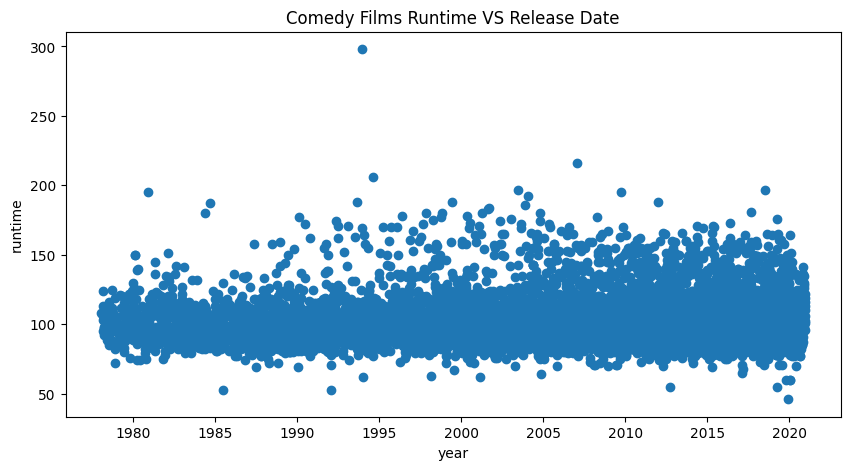

In [8]:
# specify the height and width of the chart
plt.figure(figsize=(10, 5))
# Plotting scatterplot of comedy movie ratings by the release year 
plt.scatter(comedies['release_date'], comedies['runtime'])
plt.title('Comedy Films Runtime VS Release Date')
plt.xlabel('year')
plt.ylabel('runtime')
plt.show()

From the graph above it looks like the films runtime falls between one and two hours. 

In [9]:
# Get the number of rows in the dataframe
rows_count = len(comedies.index)

rows_count

7948

In [10]:
# Convert release date to datetime
comedies['release_date'] = pd.to_datetime(comedies['release_date'])

print(comedies['release_date'])

206     1978-01-11
91      1978-02-20
67      1978-02-20
209     1978-02-24
82      1978-03-05
           ...    
28693   2020-12-14
29346   2020-12-17
29020   2020-12-25
29295   2020-12-25
28813   2020-12-28
Name: release_date, Length: 7948, dtype: datetime64[ns]


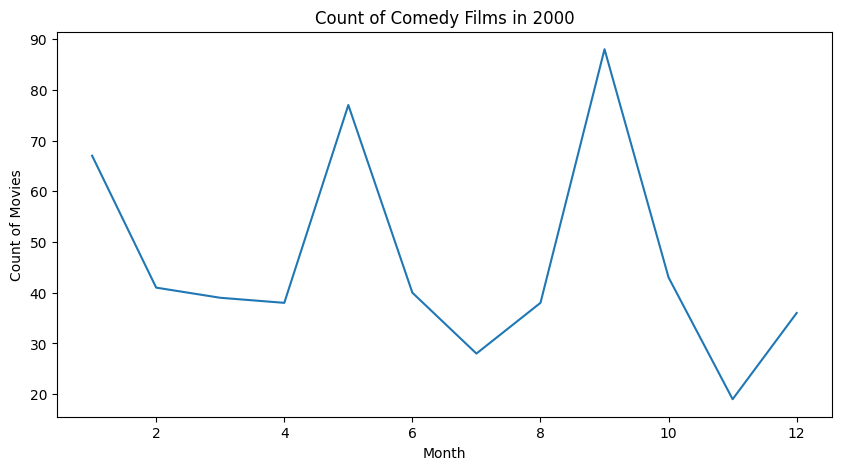

In [11]:
# Empty dictionary to hold the count of movies for year monthh in a year
monthlyMovieCount = {}

# Assigning year variable
year = 2000

# Filtering dataframe to show the specified year
comediesInYear = sorted_df[sorted_df['release_date'].apply(lambda x: x.year == year)]

# Looping through to get the count of movies for each month
for ts in comediesInYear['release_date']:
  # If the key is in the dictionary then add 1 to its count
  if ts.month in monthlyMovieCount: 
    monthlyMovieCount[ts.month] = monthlyMovieCount.get(ts.month) + 1
  # If key is not in dictionary then add it with its count
  else:
    monthlyMovieCount[ts.month] = 1
    
# specify the height and width of the chart
plt.figure(figsize=(10, 5))    

# Plotting a line chart to get the count of movies by monthh
fig = sns.lineplot(data=monthlyMovieCount)
plt.title('Count of Comedy Films in 2000')
plt.xlabel('Month')
plt.ylabel('Count of Movies')
plt.show(fig)

From the graph above you can see that the majority of the comedy films in 2000 were in the months of May and August. This is shown from the peaks in the graph at those two points.

In [12]:
# Filter dataframe to get all the films by Paramount Pictures 
paramountPictures = sorted_df[sorted_df['company'].apply(lambda x: 'Paramount Pictures' in x)]

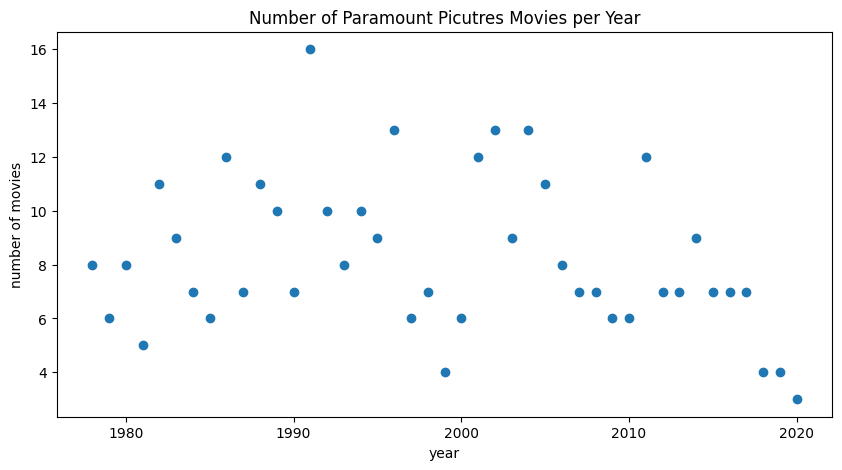

In [13]:
# Specify the size of the chart
plt.figure(figsize=(10, 5))

# Format the year
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Get movie count by the release year
movie_count = paramountPictures['release_date'].groupby(paramountPictures.release_date.dt.year).agg('count')

# Plot the count of Paramount Pictures films by year
plt.plot(movie_count, 'o')
plt.title('Number of Paramount Picutres Movies per Year')
plt.xlabel('year')
plt.ylabel('number of movies')
plt.show()

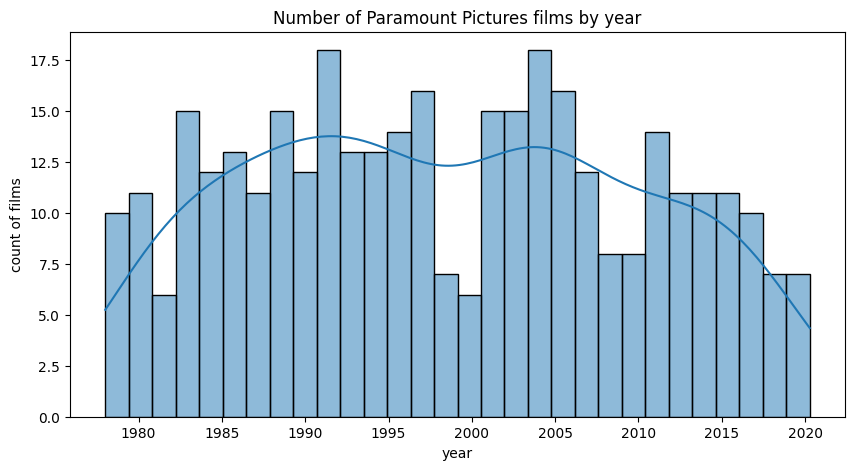

In [14]:
# Specify the size of the chart
plt.figure(figsize=(10, 5))

# Plot chart of the count of Paramount Picuture films by year
paramountFilmsCount = sns.histplot(data=paramountPictures, x='release_date', bins=30, kde=True)
plt.title('Number of Paramount Pictures films by year')
plt.xlabel('year')
plt.ylabel('count of films')
plt.show(paramountFilmsCount)

In the chart above, you can see an increase of films from 1978 to 1992 and again in 2001 to 2008.

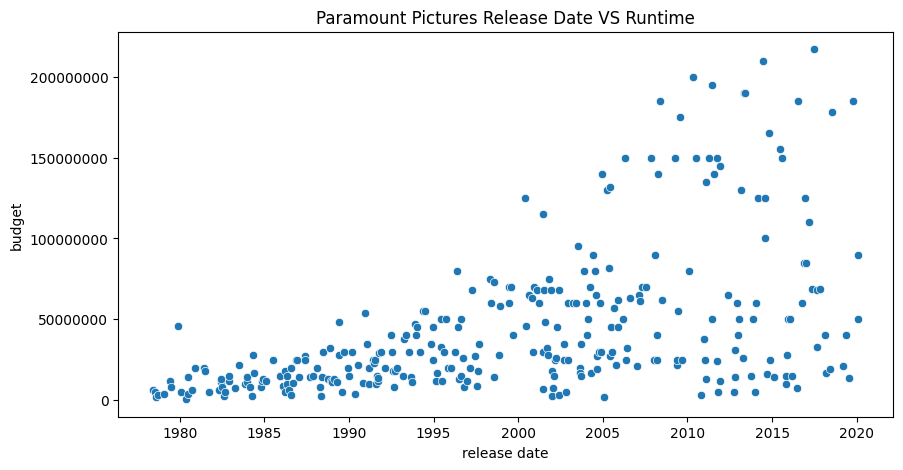

In [15]:
# Specify the size of the chart
plt.figure(figsize=(10, 5))

# Format the budget
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Plot the budget by the release year
fig = sns.scatterplot(data=paramountPictures, x='release_date', y='budget')
plt.title('Paramount Pictures Release Date VS Runtime')
plt.xlabel('release date')
plt.ylabel('budget')
plt.show(fig)

The chart above shows that the budget for Paramount Picture films have increase over the years. 

In [16]:
avg_votes = paramountPictures['votes'].mean()
print(f'{avg_votes:.2f}')

130523.90


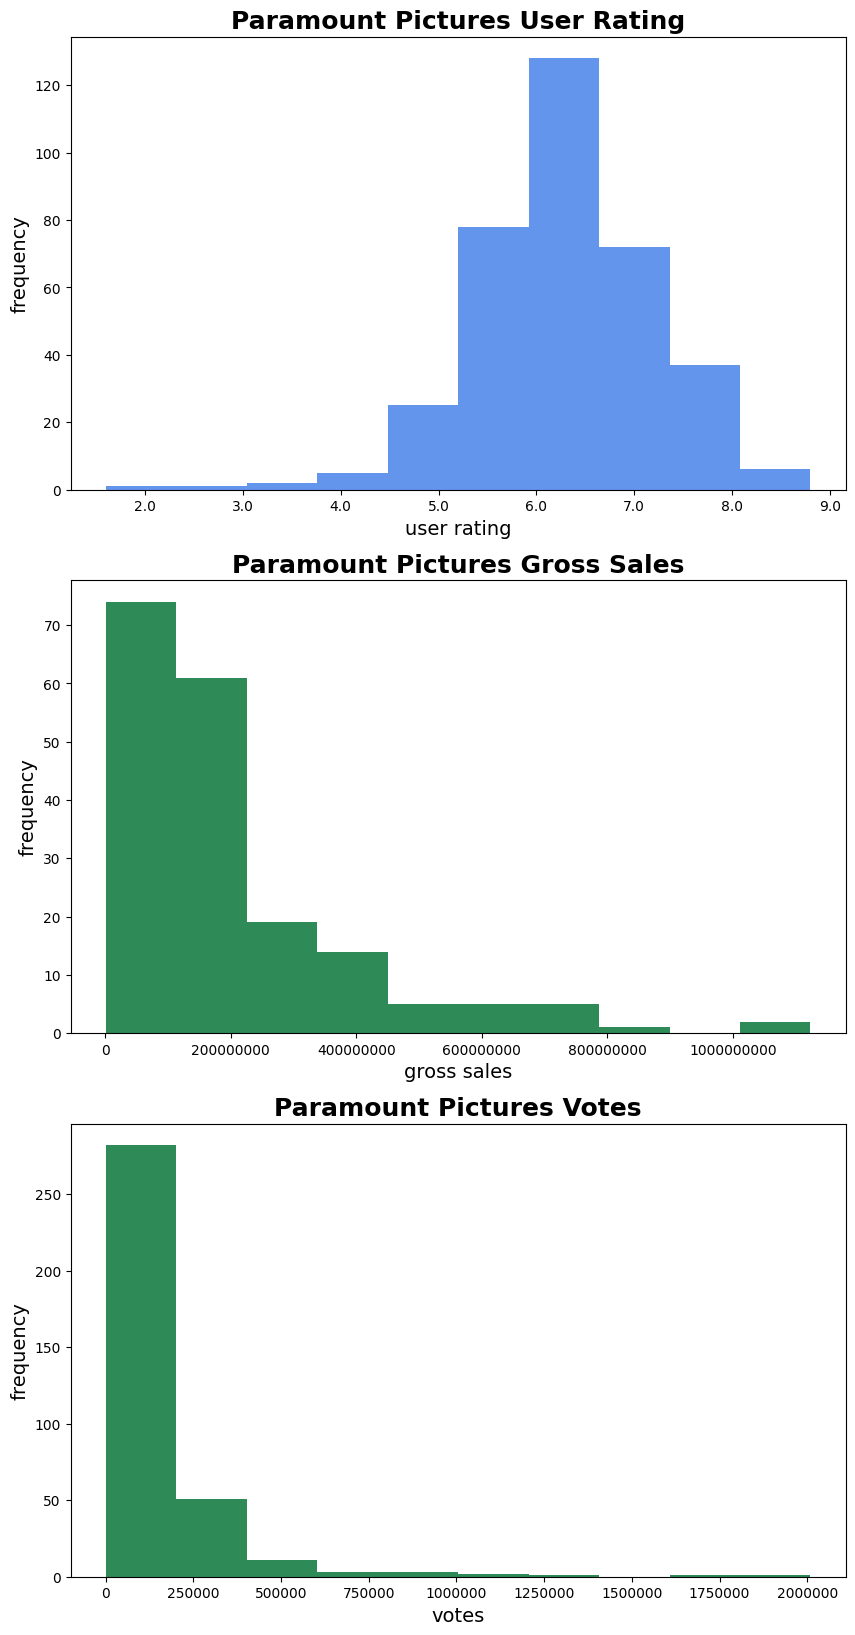

In [17]:
# Set variable to get average votes
avg_votes = paramountPictures['votes'].mean()

# Variable to keep the number of bins
n_bins = 10

# Size the plot
fig = plt.figure(figsize=(10,20))

# Plot 1
ax1 = fig.add_subplot(3,1,1) 
ax1.set_title('Paramount Pictures User Rating', weight='bold').set_fontsize('18')
ax1.set_xlabel('user rating').set_fontsize('14')
ax1.set_ylabel('frequency').set_fontsize('14')
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax1 = paramountPictures['user_rating'].hist(color='cornflowerblue', grid=False)

# Plot 2
ax2 = fig.add_subplot(3,1,2) 
ax2.set_title('Paramount Pictures Gross Sales', weight='bold').set_fontsize('18')
ax2.set_xlabel('gross sales').set_fontsize('14')
ax2.set_ylabel('frequency').set_fontsize('14')
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax2 = paramountPictures['gross_sales'].hist(color='seagreen', grid=False)

# Plot 3
ax3 = fig.add_subplot(3,1,3) 
ax3.set_title('Paramount Pictures Votes', weight='bold').set_fontsize('18')
ax3.set_xlabel('votes').set_fontsize('14')
ax3.set_ylabel('frequency').set_fontsize('14')
ax3.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax3 = paramountPictures['votes'].hist(color='seagreen', grid=False)

plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/pytho

Text(0, 0.5, 'budget')

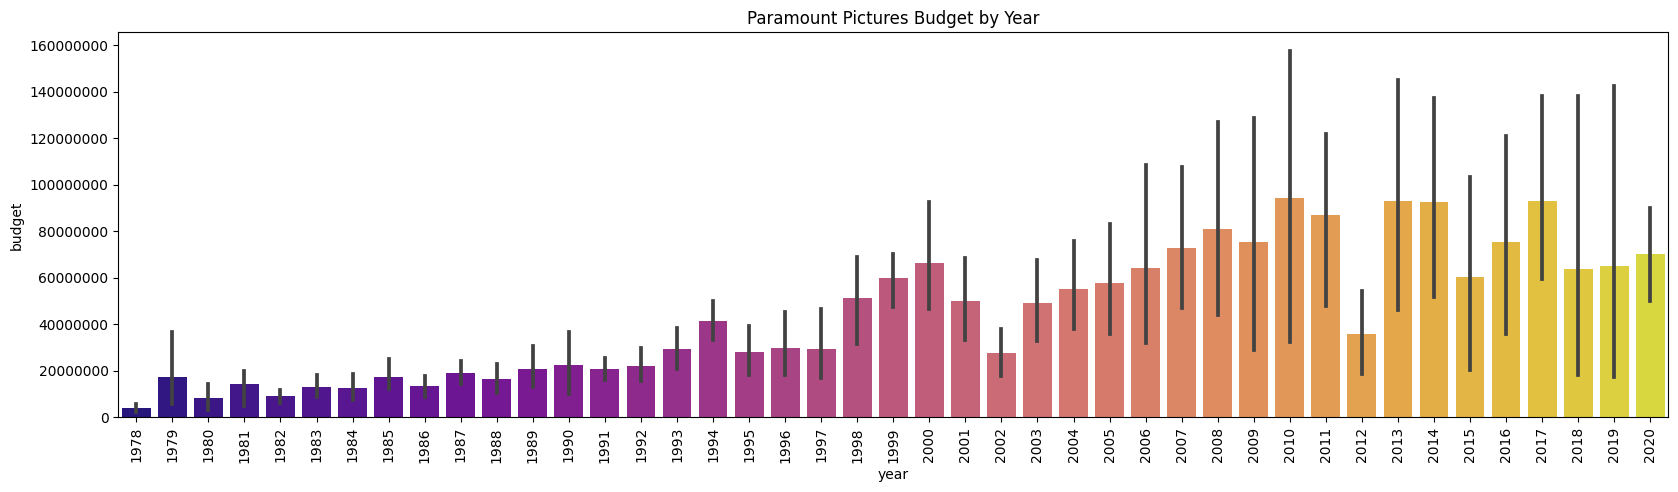

In [18]:
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
chart = sns.barplot(x = paramountPictures.release_date.dt.year, y = paramountPictures.budget, data=paramountPictures, palette='plasma')
chart.tick_params(axis='x', rotation=90)
chart.set_title('Paramount Pictures Budget by Year')
chart.set_xlabel('year')
chart.set_ylabel('budget')